# Plotting Reaction Kinetics
**Reading** in data from a file and **plotting** the data is a useful way to quickly **evaluate an experiment**. We will imagine that our data is in a **file** called "E2_DataA.csv" that is located in the same directory as this notebook. In this example, we will examine concentration vs. time data for a reaction and quickly determine if the reaction is **first or second order**. No plotting **paper** for us, we are **digital**!

First we **load** up the **tools**. We will need tools from the *MatPlotLib*, *NumPy* and *Pandas* packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

data_loc = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/data/"  # Data is on github
# data_loc = "data/"   # Data is in same folder as notebook

## Read the Data
We will read the file using the tools provided in the ***Pandas* library**. The data file includes column **headers** in its first line. We will use the `read_csv()` function in *Pandas* to create a **dataframe** object from the data file

In [2]:
df = pd.read_csv(data_loc + "E2_dataA.csv", delimiter = ",") # The fields are separated by commas.
print(df)

   time (min)  conc (mM)
0        0.50   2.741794
1        0.75   2.621148
2        1.00   2.505811
3        2.00   2.093029
4        4.00   1.460257
5        6.00   1.018787
6        9.00   0.593696


## Make a Quick Plot
Let us plot the raw data and **check** it for any insanity. As you can see, it looks good. But is it a first order reaction or a second order reaction?

We can address the columns using their **names**. We can plot any two columns as *x* and *y* values. 

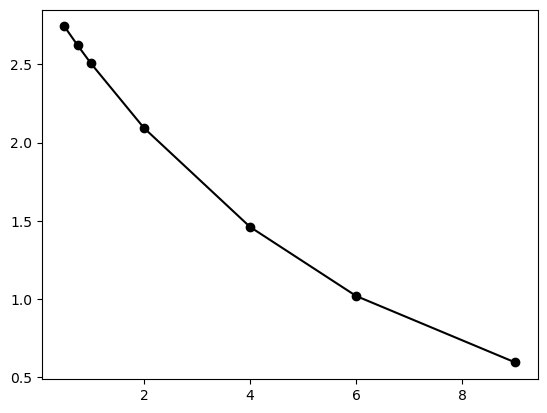

In [3]:
x,y = df["time (min)"], df["conc (mM)"]     # give the names to address the columns for the x and y data.
plt.plot(x,y, "ko-")                        # Make a quick plot.
plt.show()

## A Fancier Plot
We can also capture the list of column names from the `.columns.values` parameter within the **dataframe** object and then use those to address each column of data. This also gives us the **names** to use in the axis of the plot diagram. There are many ways to approach a problem.

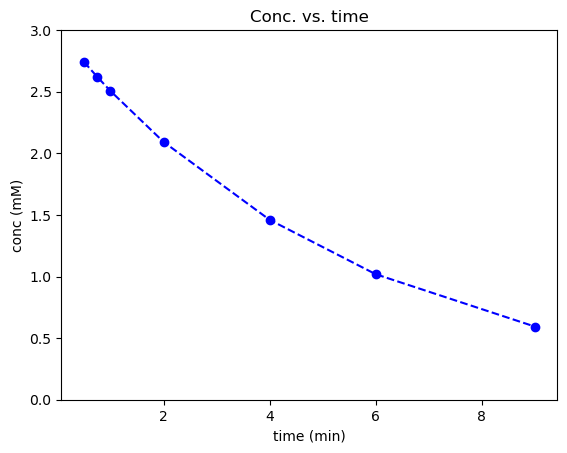

In [4]:
x_col_name, y_col_name = df.columns.values[0:2]  # get column names (two columns starting with position zero)

x, y = df[x_col_name], df[y_col_name]            # use the names to address the columns for the x and y data.

plt.plot(x, y, "bo--")                           # 'b'=blue color, 'o'=circle markers, '--'=dashed line
plt.ylim([0, np.ceil(y.max())])                  # np.ceil() rounds up to the next integer (ceiling function)
plt.xlabel(x_col_name)               
plt.ylabel(y_col_name)
plt.title("Conc. vs. time")          
plt.show()  

## Decisions, Decisions
We know how to plot first and second-order reactions as **linear plots**. So let us set that up and plot each case. If the line is linear for one of the plots then we have a match. Let us see if we can make a **decision**.

For a **first order** reaction we have $\ln [A] = \ln [A]_0 - k \cdot t$ and plotting $\ln [A]_t$ vs. $time$ we will have a linear plot. However if the reaction is not first order then the line will curve. As we have seen, the integrated rate equation for **second order** is $\frac{1}{[A]}=\frac{1}{[A]_0} + k \cdot t$. So plotting $\frac{1}{[A]}$ vs. $t$ will give a linear plot.

In [5]:
df["1/conc"] = 1/df[y_col_name]
df["ln conc"] = np.log(df[y_col_name])
display(df)                             # a prettyprint command that makes Jupyter display the object.

,time (min),conc (mM),1/conc,ln conc
0,0.50,2.741794,0.364725,1.008612
1,0.75,2.621148,0.381512,0.963612
2,1.00,2.505811,0.399072,0.918612
3,2.00,2.093029,0.477776,0.738612
4,4.00,1.460257,0.684811,0.378612
5,6.00,1.018787,0.981560,0.018612
6,9.00,0.593696,1.684363,-0.521388


## Now, We Plot
We have all the information we need now.  Let us plot the **two cases** and see if either of them fit the linear equations for 1<sup>st</sup> and 2<sup>nd</sup> order reactions. Which **model** fits the data? Use the code below to plot each case and decide for yourself.

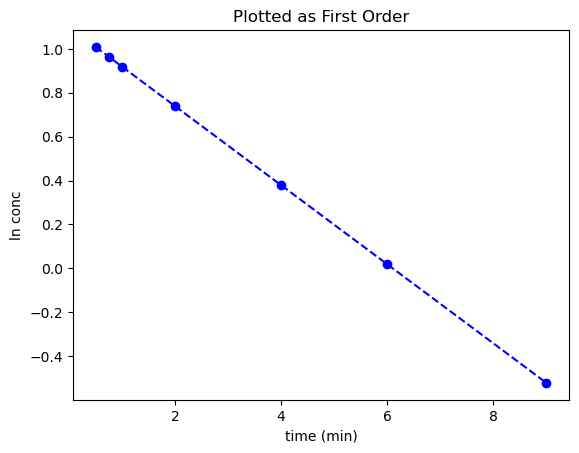

In [6]:
x, y = df[x_col_name], df["ln conc"]

fit = stats.linregress(x,y)       # linear fit of data
m = fit.slope
b = fit.intercept
y_calc = m * x + b                # y-axis calculated from fit parameters

plt.plot(x, y, "bo")              # plot data
plt.plot(x, y_calc, "b--")        # 'b'=blue color, 'o'=circle markers, '--'=dashed line
 
plt.xlabel(x_col_name)               
plt.ylabel("ln conc")
plt.title("Plotted as First Order")          
plt.show()  

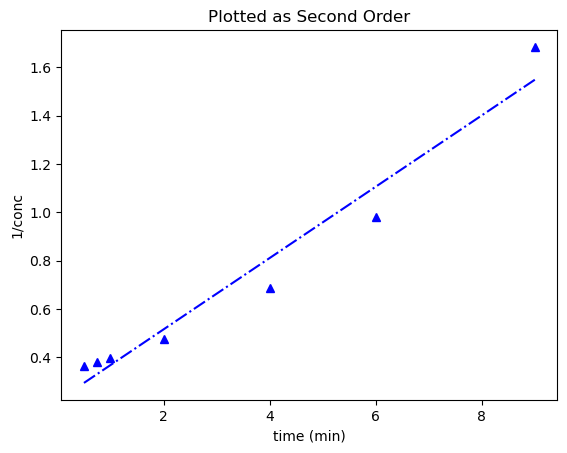

In [7]:
x, y = df[x_col_name], df["1/conc"]        
 
fit = stats.linregress(x,y)       # linear fit of data
m = fit.slope
b = fit.intercept
y_calc = m * x + b                # y-axis calculated from fit parameters

plt.plot(x, y, "b^")              # plot data
plt.plot(x, y_calc, "b-.")        # 'b'=blue color, '^'=triangle markers, '-.'=dot-dashed line

plt.xlabel(x_col_name)               
plt.ylabel("1/conc")
plt.title("Plotted as Second Order")          
plt.show()  

## Another Method for the Order of Reaction
We know that the **rate law** for a reaction can be extressed as...

$$\nu = k\cdot [A]^m[B]^n$$ 

and the exponents are the **order** of reaction for each reactant. We can change the concentrations and observe the instantaneous rate (the rate at that moment when we know the concentration, i.e. the start) of the reaction. We will take our table of **initial concentrations and initial rates** and make a **log/log plot** to determine the **order of reaction** for each reactant.

We will conduct a **series** of experiments where we **change** the concentration of one of the reactants and measure the initial rate. In this case we are examining the results as we change the concentration of reactant A. If we use a high concentration of B, then its concentration will remain almost constant (pseudo first-order conditions). We will use the following **linear relationship**... 

$$\log\nu = m\cdot\log[A] + log(k\cdot[B]^n)$$

where the $k\cdot[B]^n$ term is constant because we made it so. Let us now analyze the data

Take note of the code below. Alter it accordingly to work with your own data. 

In [8]:
import pandas as pd                # Load up all the tools we need
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


data = [
        [0.010, 0.045],                                  # Enter your own data in this list of lists 
        [0.018, 0.146],
        [0.025, 0.281],
        [0.032, 0.461],
        [0.051, 1.17]
       ]                                                   
results = pd.DataFrame(data, columns = ["[A]","rate"])   # make the dataframe object

print(results)                                           # display the dataframe

     [A]   rate
0  0.010  0.045
1  0.018  0.146
2  0.025  0.281
3  0.032  0.461
4  0.051  1.170


In [9]:
results["log[A]"] = np.log10(results["[A]"])              # perform the calculations
results["log(rate)"] = np.log10(results["rate"])
print(results)

     [A]   rate    log[A]  log(rate)
0  0.010  0.045 -2.000000  -1.346787
1  0.018  0.146 -1.744727  -0.835647
2  0.025  0.281 -1.602060  -0.551294
3  0.032  0.461 -1.494850  -0.336299
4  0.051  1.170 -1.292430   0.068186


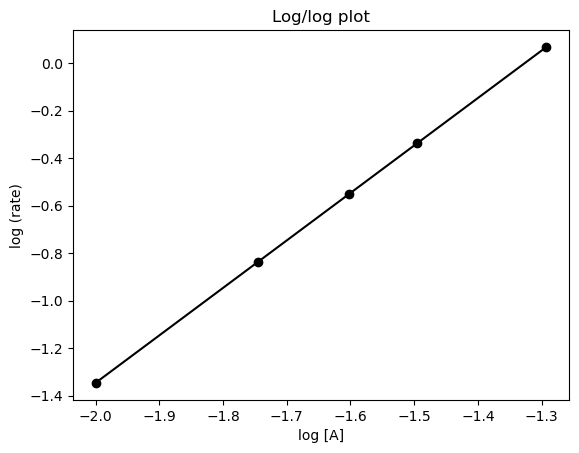

Slope = 2.00 +/- 0.0016
Intercept = 2.65 +/- 0.0026
R = 1.000


In [10]:
y, x = results["log(rate)"],results["log[A]"]

fit = stats.linregress(x, y)      # linear regression data fit
m = fit.slope
b = fit.intercept
y_calc = m * x + b                # y-axis calculated from fit parameters

plt.plot(x, y, "ko")              # plot data
plt.plot(x, y_calc, "k-")         # plot line fit

plt.xlabel("log [A]")               
plt.ylabel("log (rate)")
plt.title("Log/log plot")          
plt.show()  

print("Slope = {:.2f} +/- {:.4f}".format(m, 2*fit.stderr))          
print("Intercept = {:.2f} +/- {:.4f}".format(b, 2*fit.intercept_stderr))   
print("R = {:.3f}".format(fit.rvalue))

## Summary
We have seen how to **import** data from a data file and use the tools of a *Pandas* **dataframe** to manipulate it. We have seen how to plot this data and also have been introduced to a handful of options for changing the appearance of the plots. There are many ways to change the **style** in plots.   

We have also demonstrated determining the order of a reaction by plotting the data using the integrated rate equations for first and second-order reactions and also in an experiment where we plot the rate vs. reactant concentration.

## Resources
The **data file** can be obtained from the resources section of the course **moodle** site. The contents of the file are displayed below so that you can make it yourself if you are unable to access moodle.

**E2_DataA.csv**
```
time (min),conc (mM)
0.5,2.741793556
0.75,2.621147735
1,2.505810634
2,2.093028978
4,1.460256768
6,1.018786577
9,0.593696097
```